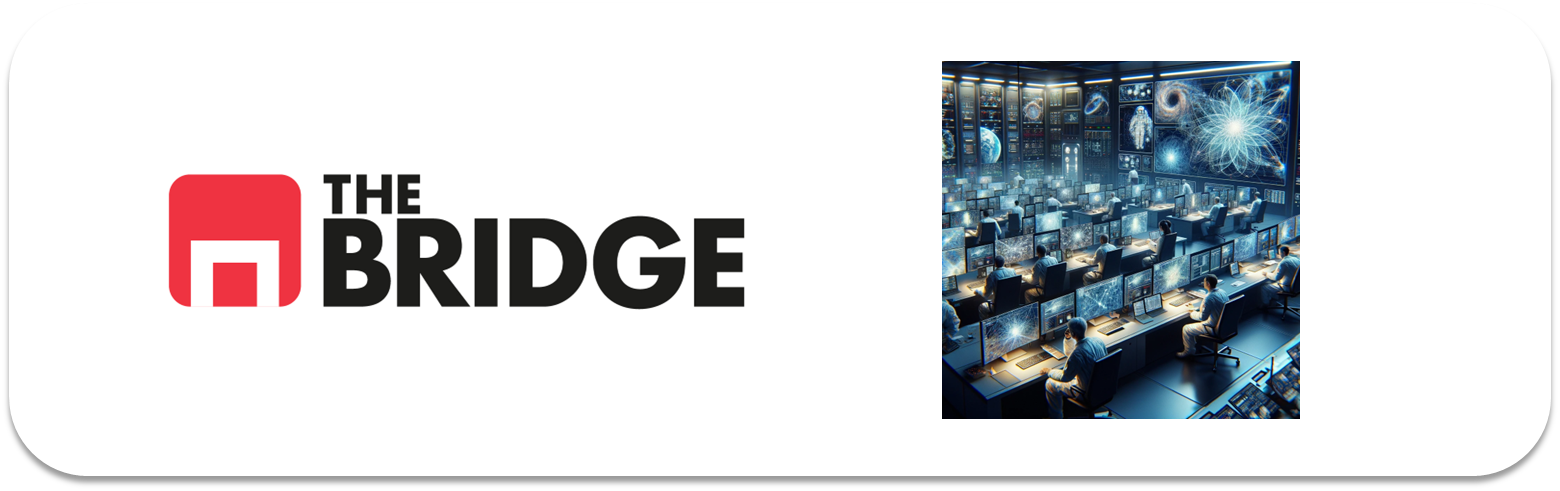

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [26]:
import tensorflow as tf

# Configurar la GPU antes de inicializar TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import tensorboard

In [100]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
#permite cargar, preprocesar y aumentar las imágenes.
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img



In [84]:
#se carga, preprocesa y genera lotes de imágenes a partir de un directorio con subcarpetas con imagenes 
dir= r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRINT_19_DL_APLICADO_IMAGENES\UNIT1\TRABAJO\data"
tipos =["github_train_0", "github_train_1", "github_train_2", "github_train_3", "github_train_4"]
size= (32,32)#tamaño deseado de las imagenes

In [85]:
#normalizamos ldoe pixeles entre 1 a 255 y reservando un 0.2 para test val)
data = ImageDataGenerator(rescale=1./255, validation_split=0.2)

entrenamiento = data.flow_from_directory(# señala que coja los datos del directorio)
    dir,
    target_size=size,
    batch_size=32,#numero de imagenes q se cargaran por lotes
    class_mode="sparse",
    subset="training"#señalamos que solo trabajaremos con train, si huebara capreta de validacion, lo pocndriamos tb
)

validacion = data.flow_from_directory(
    dir,
    target_size=size,
    batch_size=32,
    class_mode="sparse",
    subset="validation"
)


Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [86]:
dir_test= r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRINT_19_DL_APLICADO_IMAGENES\UNIT1\TRABAJO\data"
test=["github_test"]
size= (32,32)#tamaño deseado de las imagenes

In [177]:
para_test = data.flow_from_directory(
    dir_test,
    target_size=size,
    class_mode="sparse",
    batch_size=32,
    )
true_classes = para_test.classes
true_classes


Found 5000 images belonging to 5 classes.


In [7]:
"""# conviereto en array para modelo
X_train, y_train= entrenamiento.next()
X_val, y_val= validacion.next()
)"""

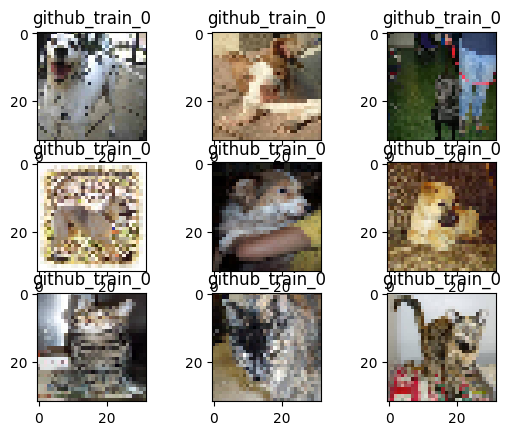

In [109]:
for images, labels in entrenamiento:
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(images[i])
        plt.title(tipos[np.argmax(labels[i])])
    plt.show()
    break


In [9]:

"""print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)"""

(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 5)
(32, 5)
(32, 32, 32, 3)
(32, 5)


In [84]:
"""#escalamos a minmaxscaler
X_train=X_train/255
y_train=y_train/255
X_test=X_test/255
y_test=y_test/255
X_val=X_val/255
y_val=y_val/255

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)
"""


(32, 32, 32, 3)
(32, 32, 32, 3)
(32, 5)
(32, 5)
(32, 32, 32, 3)
(32, 5)


In [ ]:
"""# conversion X_train X_val y X_test a arrays
X_train = X_train.values.reshape(-1,32,32)
X_val = X_val.values.reshape(-1, 32, 32)
X_test = X_test.values.reshape(-1,32,32)"""

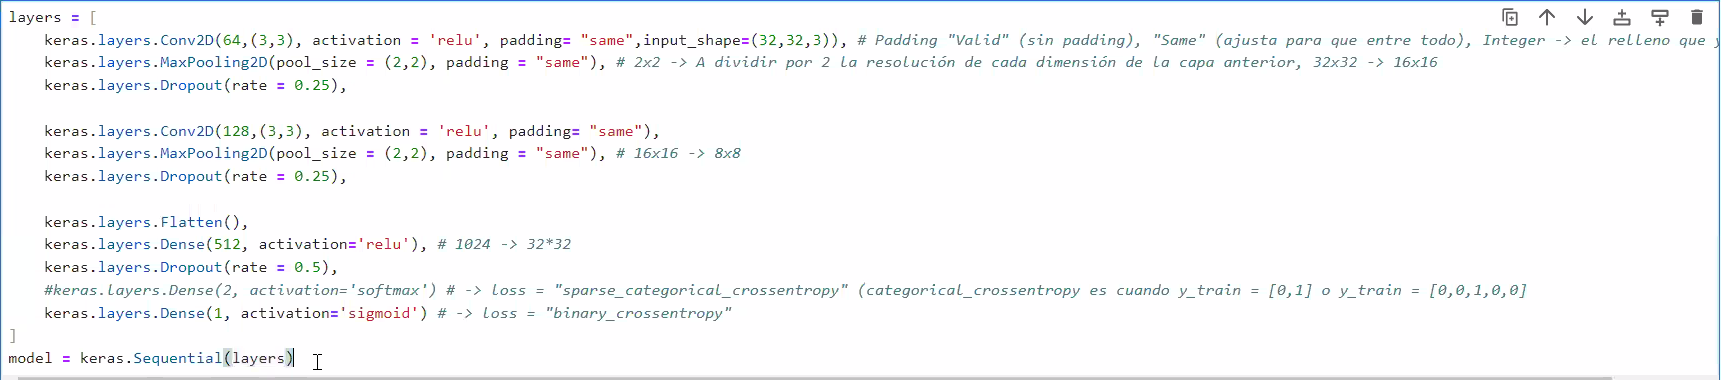

In [154]:
#instancio el modelo

modelo = tf.keras.Sequential()

EXTRACCION DE CARECTERISTICAS

In [155]:
#1 concvolucional-Polling, con 625 unidades convolucionales , con un kernel cuadrado de 5x5,  stride por defecto (1x1) y con padding
modelo.add(Conv2D(filters=128, kernel_size=(6, 6), strides=(1, 1), padding='same', activation='relu', input_shape=(32,32,3)))
modelo.add(MaxPooling2D(pool_size=(3, 3), strides=(3,3), padding="same"))# CAPA POOLING con 2x2 de kernel
modelo.add(Dropout(0.25))
           
#3 concvolucional-Polling, con 64 unidades convolucionales , con un kernel cuadrado de 5x5,  stride por defecto (1x1) y con padding   
modelo.add(Conv2D(256, (6, 6), activation='relu', padding='same'))
modelo.add(MaxPooling2D(pool_size=(3, 3), strides=(3,3), padding=("same")))# CAPA POOLING con 2x2 de kernel
modelo.add(Dropout(0.25))

#6 concvolucional-Polling, con 128 unidades convolucionales , con un kernel cuadrado de 5x5,  stride por defecto (1x1) y con padding   
modelo.add(Conv2D(512, (6, 6), activation='relu', padding='same'))
modelo.add(MaxPooling2D(pool_size=(3, 3), strides=(3,3), padding=("same")))# CAPA POOLING con 2x2 de kernel
modelo.add(Dropout(0.25))


In [156]:
# antes de entrar en la en la nueva red neuronal, hay que aplanar la salida full connected

modelo.add(Flatten())
print("Entrada de la capa flatten:", modelo.output.shape) # Salida de la capa flatten: (None, tamaño_aplanado)
modelo.add(Dropout(0.5))
modelo.add(Dense(5, activation="softmax"))


Entrada de la capa flatten: (None, 2048)


CARACTERIZACION

In [157]:
optimizador = Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999)

In [171]:
# Capa de aplanamiento para convertir imágenes 2D en un vector 1D
modelo.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))

# Primera capa densa  y activación ReLU
modelo.add(tf.keras.layers.Dense(units=100, activation='relu'))

# Segunda capa densa y activación ReLU
modelo.add(tf.keras.layers.Dense(units=100, activation='relu'))

# Capa de salida con 10 neuronas (una para cada clase) y activación softmax
modelo.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# Compilación del modelo
modelo.compile(optimizer=optimizador,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
# Entrenar el modelo

history = modelo.fit(
    entrenamiento,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_cb],  # Callback para early stopping
    validation_data=validacion,
    steps_per_epoch=len(entrenamiento),  # Número total de lotes en entrenamiento
    validation_steps=len(validacion),  # Número total de lotes en la validación
)


# Predicción
y_pred = modelo.predict(para_test)
y_pred_classes = np.argmax(y_pred, axis=1)


Epoch 1/100
125/125 [==============================] - 8s 56ms/step - loss: 2.0254 - accuracy: 0.2083 - val_loss: 1.6383 - val_accuracy: 0.2000
Epoch 2/100
125/125 [==============================] - 7s 53ms/step - loss: 1.6274 - accuracy: 0.2040 - val_loss: 1.6298 - val_accuracy: 0.2000
Epoch 3/100
125/125 [==============================] - 9s 69ms/step - loss: 1.6242 - accuracy: 0.1890 - val_loss: 1.6282 - val_accuracy: 0.2000
Epoch 4/100
125/125 [==============================] - 7s 53ms/step - loss: 1.6273 - accuracy: 0.1855 - val_loss: 1.6329 - val_accuracy: 0.2000
Epoch 5/100
125/125 [==============================] - 7s 54ms/step - loss: 1.6199 - accuracy: 0.2000 - val_loss: 1.6172 - val_accuracy: 0.2000
Epoch 6/100
125/125 [==============================] - 9s 71ms/step - loss: 1.6182 - accuracy: 0.1930 - val_loss: 1.6251 - val_accuracy: 0.2000
Epoch 7/100
125/125 [==============================] - 7s 55ms/step - loss: 1.6194 - accuracy: 0.1937 - val_loss: 1.6212 - val_accuracy:

In [173]:
# Resumen del modelo
modelo.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 32, 32, 128)       13952     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 11, 11, 256)       1179904   
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 4, 4, 512)       

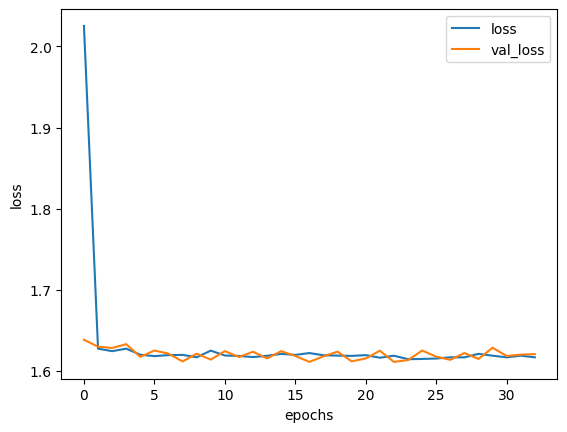

In [174]:
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");


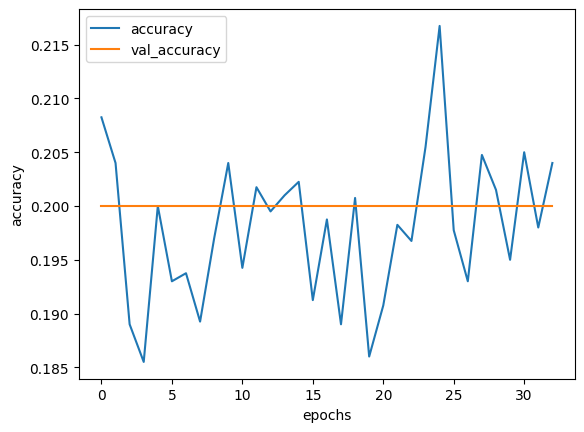

In [175]:
history_df = pd.DataFrame(history.history)
history_df[["accuracy","val_accuracy"]].plot();
plt.xlabel("epochs")
plt.ylabel("accuracy");

In [176]:
print(classification_report(true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.20      1.00      0.33      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000

    accuracy                           0.20      5000
   macro avg       0.04      0.20      0.07      5000
weighted avg       0.04      0.20      0.07      5000



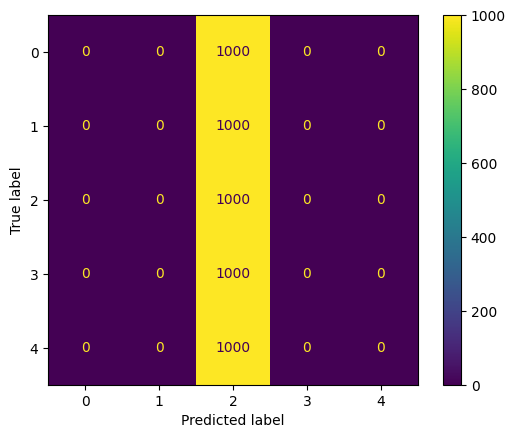

In [188]:
grafica = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(true_classes, y_pred_classes))
grafica.plot()
plt.show()

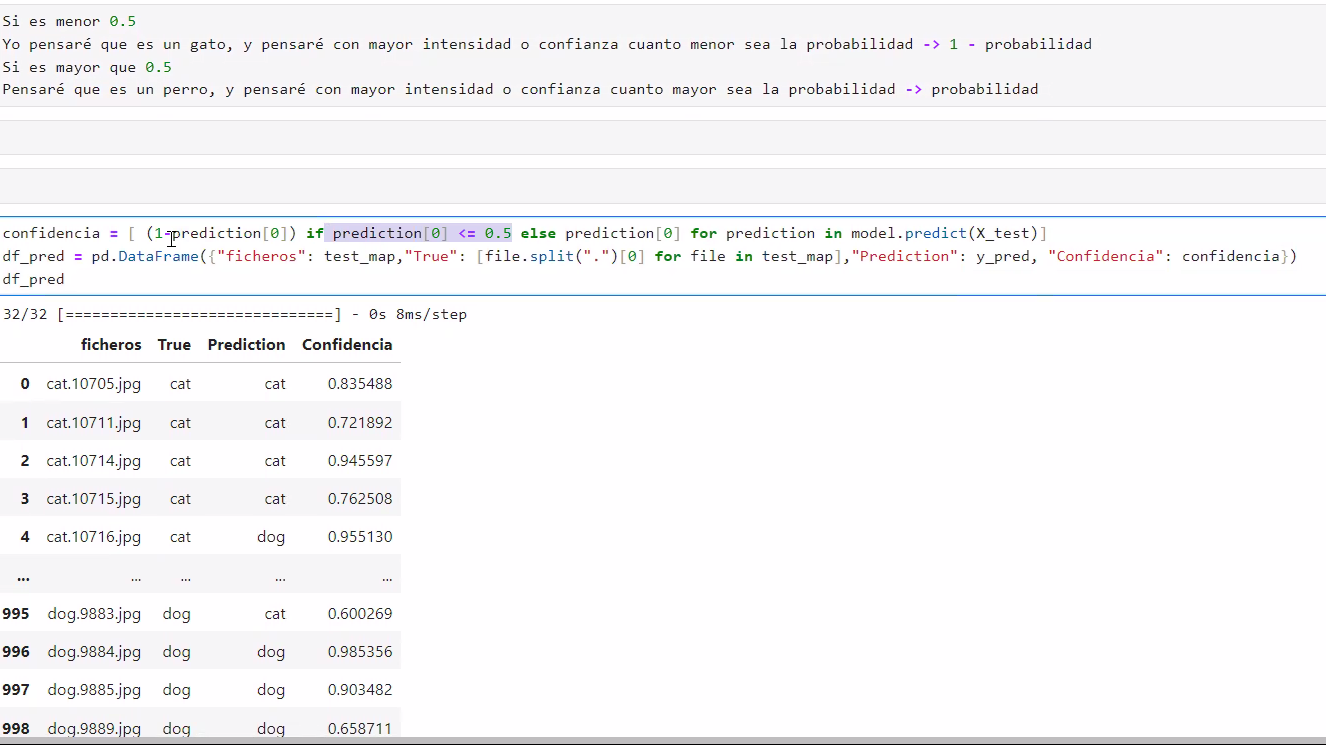

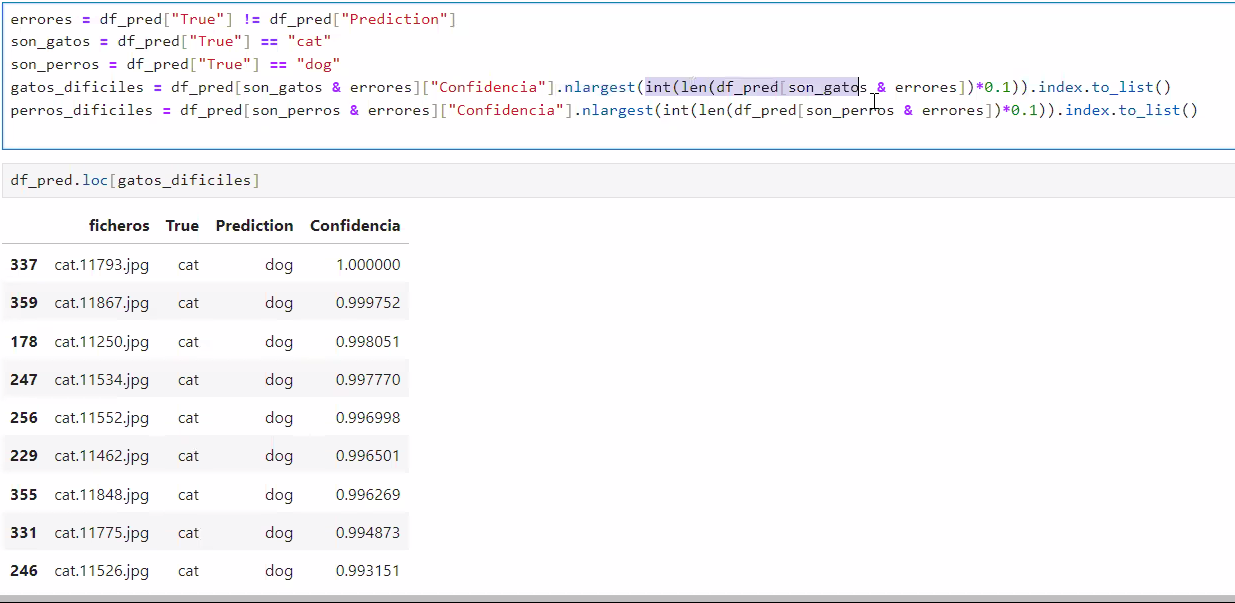

In [184]:

# probabilidades de predicción a partir de las clases predichas 

y_pred_probabilidades = to_categorical(y_pred_classes)


In [185]:
# Identifico las muestras mal clasificadas
muestras_mal = np.where(true_classes != y_pred_classes)[0]

# probabilidades de predicción para las muestras mal clasificadas
probabilidades = y_pred_probabilidades[muestras_mal]

# Calcula la probabilidad de pertenencia a la clase incorrecta, la de mayor probabilidad
pertenencia_clase_incorrecta = np.max(probabilidades, axis=1)

# Ordeno las muestras mal clasificadas por probabilidad de pertenencia a clase incorrecta
ordeno_indices = np.argsort(pertenencia_clase_incorrecta)

# Calculo el número de muestras que representan el 10% de las muestras mal clasificadas
numero_mestras_malas = int(0.1 * len(muestras_mal))

# Seleccion de muestras con la mayor confianza 
resultado = muestras_mal[ordeno_indices[-numero_mestras_malas:]]



In [186]:
len(resultado)

400

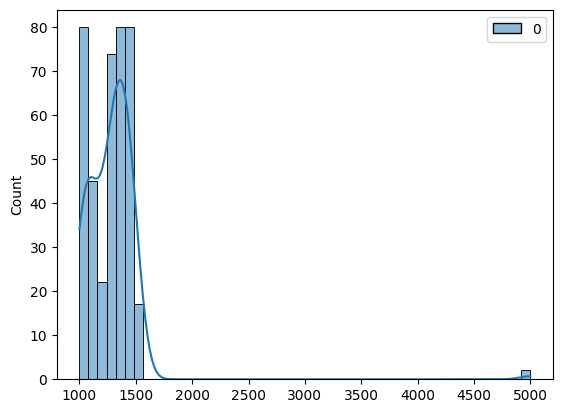

In [187]:
df_resultado=pd.DataFrame(resultado)

sns.histplot(df_resultado, kde=True);


EXTRA EN CLASE

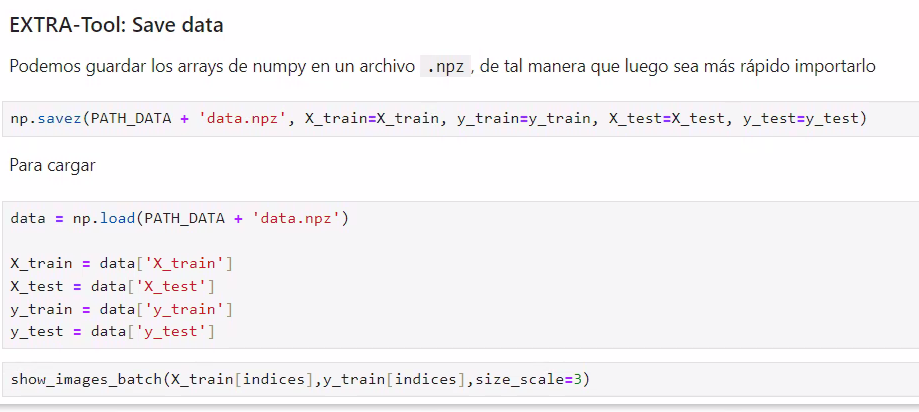

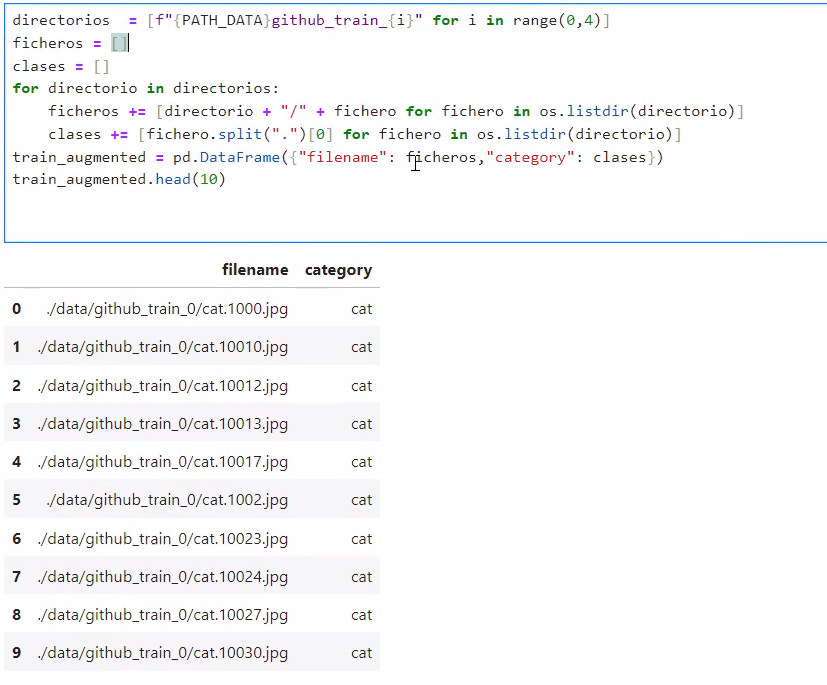

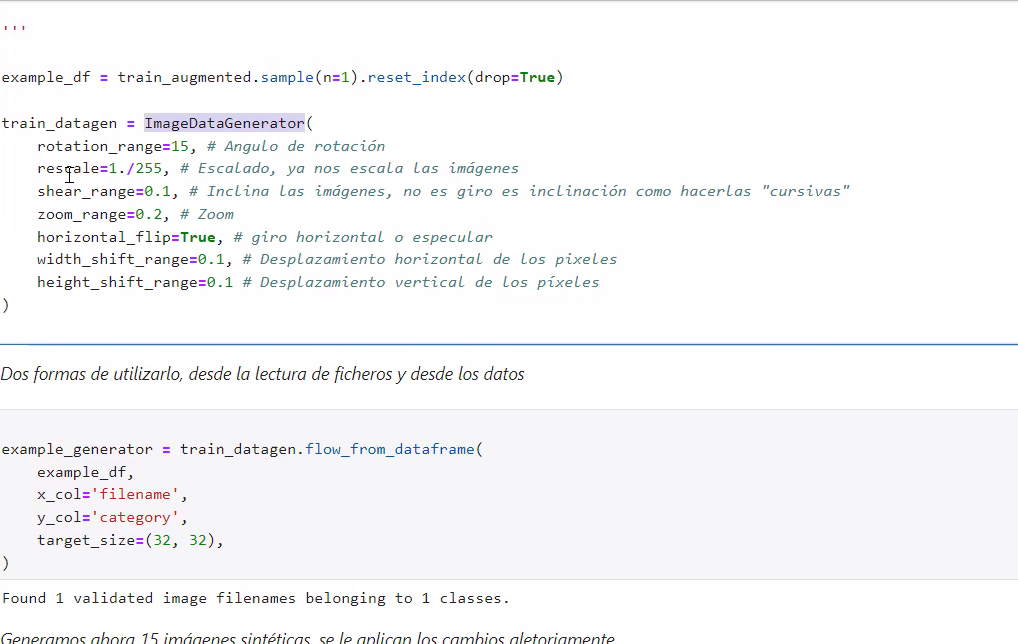

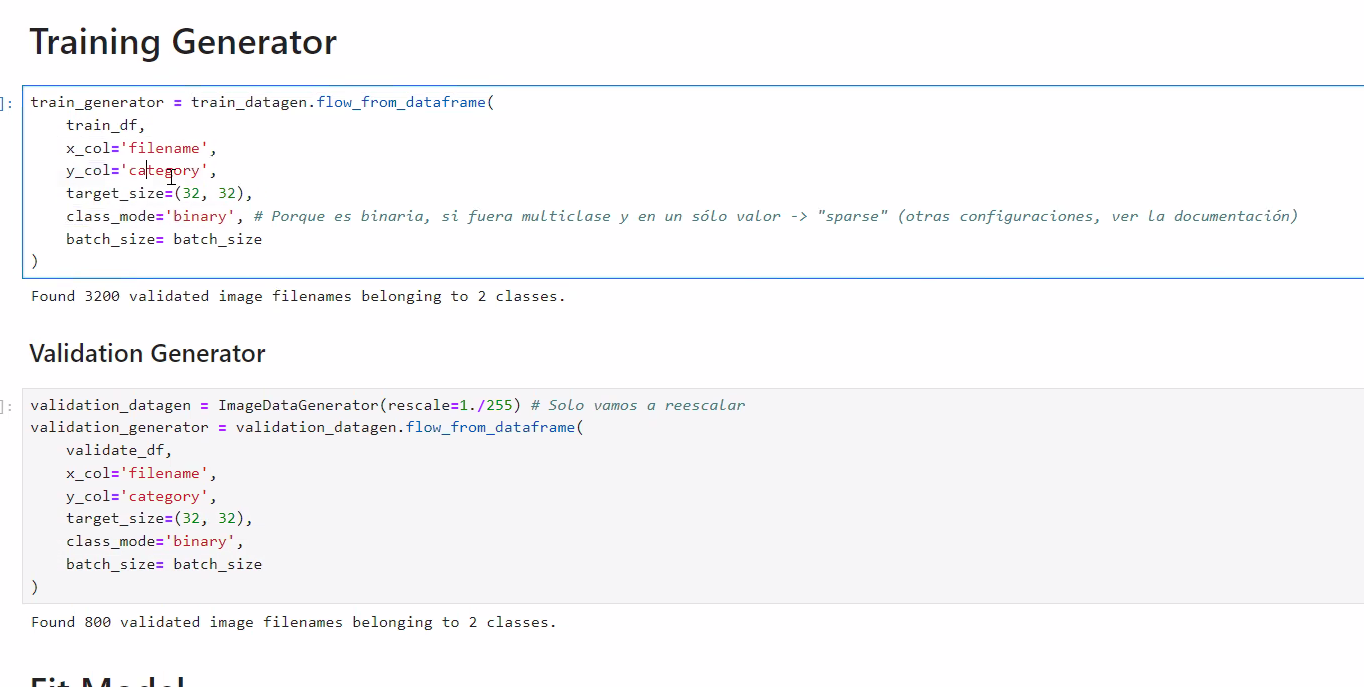

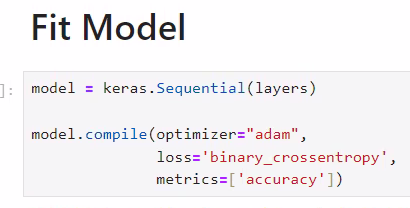